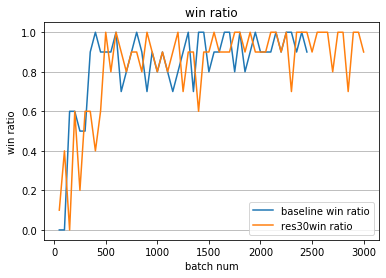

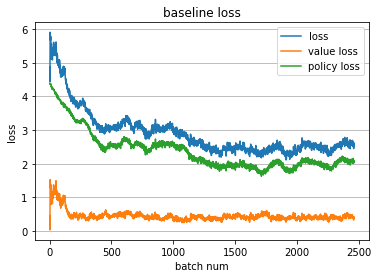

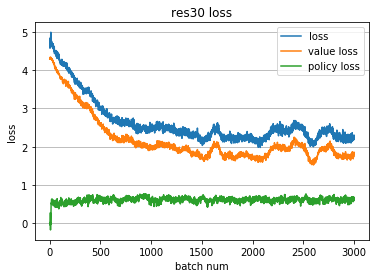

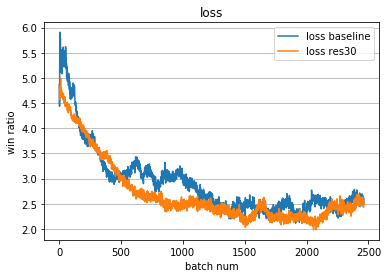

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def loss_plot(intermediate_result_file, model_name):
    batch = []
    loss = []
    value_loss = []
    policy_loss = []
    entropy = []
    with open(intermediate_result_file,'r') as f:
        for line in f:
            line = line.strip().split(',')
            batch.append(line[0].split(':')[-1])
            loss.append(line[4].split(':')[-1])
            value_loss.append(line[5].split(':')[-1])
            policy_loss.append(line[6].split(':')[-1])
            entropy.append(line[7].split(':')[-1])

    batch = np.array(batch).astype(int)
    loss = np.array(loss).astype(float)
    value_loss = np.array(value_loss).astype(float)
    policy_loss = np.array(policy_loss).astype(float)
    entropy = np.array(entropy).astype(float)

    plt.plot(batch, loss, label='loss')
    plt.plot(batch, value_loss, label='value loss')
    plt.plot(batch, policy_loss, label='policy loss')
    plt.legend()
    plt.title(model_name + ' loss')
    plt.xlabel('batch num')
    plt.ylabel('loss')
    plt.grid(axis='y')
    plt.show()
    return pd.DataFrame(data=[batch, loss]).T

def win_ratio_plot(scores_result_file_1, model_name_1, scores_result_file_2, model_name_2):
    batch_50_1 = []
    win_ratio_1 = []
    with open(scores_result_file_1,'r') as f:
        for line in f:
            line = line.strip().split(',')
            batch_50_1.append(line[0].split(':')[-1])
            win_ratio_1.append(line[-1].split(':')[-1])

    batch_50_1 = np.array(batch_50_1).astype(int)
    win_ratio_1 = np.array(win_ratio_1).astype(float)

    batch_50_2 = []
    win_ratio_2 = []
    with open(scores_result_file_2,'r') as f:
        for line in f:
            line = line.strip().split(',')
            batch_50_2.append(line[0].split(':')[-1])
            win_ratio_2.append(line[-1].split(':')[-1])

    batch_50_2 = np.array(batch_50_2).astype(int)
    win_ratio_2 = np.array(win_ratio_2).astype(float)

    plt.plot(batch_50_1, win_ratio_1, label=model_name_1 + ' win ratio')
    plt.plot(batch_50_2, win_ratio_2, label=model_name_2 + 'win ratio')
    plt.legend()
    plt.title('win ratio')
    plt.xlabel('batch num')
    plt.ylabel('win ratio')
    plt.grid(axis='y')
    plt.show()

win_ratio_plot('output/scores.txt', 'baseline', 'output/res30_l+_scores.txt', 'res30')

df_baseline = loss_plot('output/intermediate_result.txt', 'baseline')
df_baseline.columns = ['batch_num', 'loss_baseline']
df_res30 = loss_plot('output/res30_l+_intermediate_result_tmp.txt', 'res30')
df_res30.columns = ['batch_num', 'loss_res30']
df_merged = pd.merge(df_baseline, df_res30, how='left', on='batch_num')
plt.plot(df_merged['batch_num'], df_merged['loss_baseline'], label='loss baseline')
plt.plot(df_merged['batch_num'], df_merged['loss_res30'], label='loss res30')
plt.legend()
plt.title('loss')
plt.xlabel('batch num')
plt.ylabel('win ratio')
plt.grid(axis='y')
plt.show()

In [5]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

rescue_code(loss_plot)

In [ ]:
def loss_plot(intermediate_result_file):
    batch = []
    loss = []
    value_loss = []
    policy_loss = []
    entropy = []
    with open(intermediate_result_file,'r') as f:
        for line in f:
            line = line.strip().split(',')
            batch.append(line[0].split(':')[-1])
            loss.append(line[4].split(':')[-1])
            value_loss.append(line[5].split(':')[-1])
            policy_loss.append(line[6].split(':')[-1])
            entropy.append(line[7].split(':')[-1])

    batch = np.array(batch).astype(float)
    loss = np.array(loss).astype(float)
    value_loss = np.array(value_loss).astype(float)
    policy_loss = np.array(policy_loss).astype(float)
    entropy = np.array(entropy).astype(float)

    plt.plot(batch, loss, label='loss')
    plt.plot(batch, value_loss, label='value loss')
    plt.plot(batch, policy_loss, label='policy loss')
    plt.legend()
    plt.title('loss')
    plt.xlabel('batch num')
    plt.ylabel('loss')
    plt.grid(axis='y')
    plt.show()
